PW 04 : Linear Regression
================================

In [57]:
from numpy.linalg import inv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import random as rd

%matplotlib inline

## Exercice 1  Get the data

a) histogram to visualize the distribution of the renting price
b) histogram to visualize the distribution of the living area
c) scatter plot of living area as a function of renting price

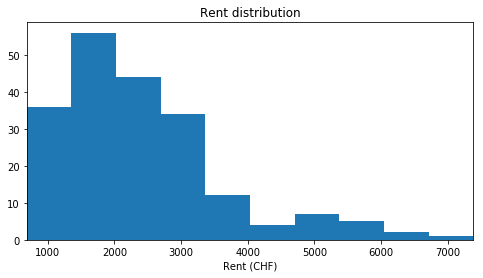

In [59]:
datafile = '/Users/lorenz/Documents/ML-PW-2018/PW04/lausanne-appart.xlsx'

dataset = pd.read_excel(datafile, names=['living_area','nb_rooms','rent'])

rent = dataset['rent'].values
living_area = dataset['living_area'].values

plt.figure(1,figsize = (8, 4))
plt.hist(rent)
plt.xlabel("Rent (CHF)")
plt.title('Rent distribution')
plt.xlim(np.min(rent),np.max(rent))
plt.show()

b) histogram to visualize the distribution of the living area

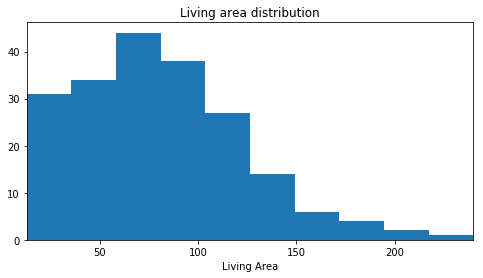

In [60]:
plt.figure(1,figsize = (8, 4))
plt.hist(living_area)
plt.xlabel("Living Area")
plt.title('Living area distribution')
plt.xlim(np.min(living_area),np.max(living_area))
plt.show()

c) scatter plot of living area as a function of renting price

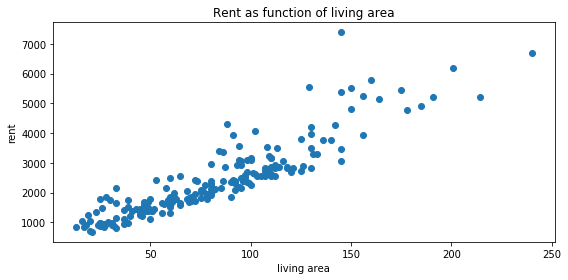

In [25]:
plt.figure(1,figsize = (8, 4))
plt.scatter(living_area,rent)
plt.title('Rent as function of living area')
plt.xlabel('living area')
plt.ylabel('rent')
plt.tight_layout()
plt.show()

## Exercice 2 Normal equations for linear regression

a) Implement Equation 3 assuming that
x
is the living area and
y
is the renting price. Use
numpy for the vector operations. Plot the computed line on top of the scatter plot of
exercise 1.

slope : 26.332424571995666
intercept : 240.07710726596173


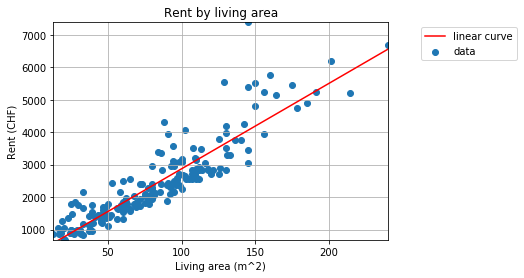

In [29]:
X = living_area
y = rent

Xtmp = np.c_[np.ones(X.shape[0]),X]

theta = inv(Xtmp.transpose().dot(Xtmp)).dot(Xtmp.transpose()).dot(y)
slope = theta[1]
intercept = theta[0]

print('slope :',slope)
print('intercept :',intercept)

x_curve = np.array(np.linspace(np.min(X),np.max(X),200))
y_curve = x_curve * slope + intercept

plt.title('Rent by living area')
plt.xlabel('Living area (m^2)')
plt.ylabel('Rent (CHF)')
plt.scatter(X,y)
plt.plot(x_curve,y_curve,color='red')
plt.legend(['linear curve','data'],bbox_to_anchor=(1.4, 1))
plt.grid(True)
plt.xlim(np.min(X),np.max(X))
plt.ylim(np.min(y),np.max(y))
plt.show()

b) Compute the overall cost value according to Equation 2.

In [31]:
def calcualteJ(X,y,slope,intercept):
    yHat = X * slope + intercept
    diff = y - yHat
    total = sum([i ** 2 for i in diff])
    J = (total)/(2*len(X))
    return J

J = calcualteJ(X,y,slope,intercept)

print("The total value of the cost function is" , J)

The total value of the cost function is 138034.95779787414


## Exercice 3 Batch gradient descent for linear regression

a) Plot the cost value (Equation 2) as a function of the iterations. What do you observe ?

In [33]:
# Gradient descent function
def hypothesis(x,theta):
    return theta.transpose().dot(x)

def gradientDescentBatch(x,y,learning_rate,num_epoch,verbose=False):
    N = x.shape[0]     # number of sample
    D = x.shape[1]     # number of dimensions
    theta = np.ones(D) # init thetas to some values
    new_theta = np.ones(D)
    cost_array = []
    for itr in range(0,num_epoch):
        cost = 0.0
        delta = 0.0
        for j in range(0,D):
            for i in range (0,N):
                error = hypothesis(x[i],theta) - y[i]
                delta = delta + error * x[i,j]
                cost = cost + error**2
            new_theta[j] = theta[j] - learning_rate * (1.0/N) * delta
        theta = np.copy(new_theta) # update the thetas once the new values are all computed
        cost_array.append(cost)
        if verbose:
            print('itr : ',itr,' theta : ',theta)

    return [theta, cost_array]

lr = 0.00001
itr = 200

Xtmp = np.c_[np.ones(X.shape[0]),X]
tmp = gradientDescentBatch(Xtmp,y,lr,itr,verbose=False)
theta = tmp[0]



# for later
lr_batch = lr
itr_batch = itr
theta_batch = theta

slope_bgd = theta[1]
intercept_bgd = theta[0]

print('slope :',slope_bgd)
print('intercept :',intercept_bgd)

slope : 28.65186261767307
intercept : 1.3661915208241886


a) Plot the cost value (Equation 2) as a function of the iterations. What do you observe ?

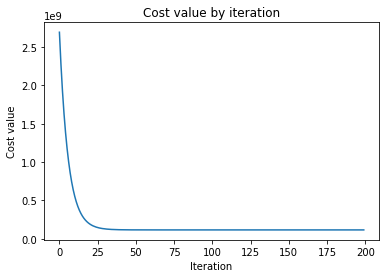

In [34]:
cost_array = tmp[1]

plt.title('Cost value by iteration')
plt.xlabel('Iteration')
plt.ylabel('Cost value')
plt.plot(cost_array)

plt.show()


b) Imagine a stopping criterion, i.e. when do we stop iterating on the training set ?

E.g. We can stop iterating, by chosing a theshold = T and check if

$$J{\theta_{n-1}} - J{\theta_{n}} < T. $$

We could also check if update criteria (in code delta) below a value. The reason being, that it should tend towards 0 if we approach the minimum.


c) Plot the computed line
h
θ
(
x
)
on top of the scatter plot of exercise 1

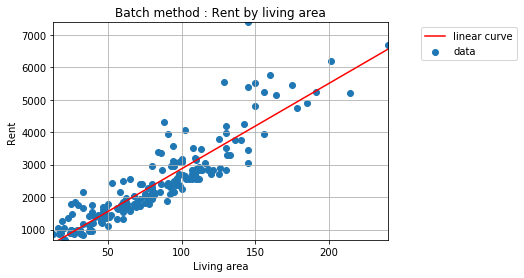

In [35]:
x_curve = np.array(np.linspace(np.min(X),np.max(X),200))
y_curve = x_curve * slope + intercept

plt.title('Batch method : Rent by living area')
plt.xlabel('Living area')
plt.ylabel('Rent')
plt.scatter(X,y)
plt.plot(x_curve,y_curve,color='red')
plt.legend(['linear curve','data'],bbox_to_anchor=(1.4, 1))
plt.grid(True)
plt.xlim(np.min(X),np.max(X))
plt.ylim(np.min(y),np.max(y))
plt.show()

d) Compute the final cost value according to Equation 2 and compare it to the one of
exercise 2. What can you conclude ?

In [37]:
J_bgd = calcualteJ(X,y,slope_bgd,intercept_bgd)


print("The total cost value is", J_bgd, "and for closed from solution", J)

The total cost value is 144106.45423554225 and for closed from solution 138034.95779787414


## Exercice 4 Stochastic gradient descent for linear regression

In [40]:
def hypothesis(x,theta):
    return theta.transpose().dot(x)

# Gradient descent function Stochastic
def gradientDescentStochastic(x,y,learning_rate,num_iteration,verbose=False):
    N = x.shape[0]     # number of sample
    D = x.shape[1]     # number of dimensions
    theta = np.ones(D) # init the thetas to some values
    new_theta = np.ones(D)
    delta_list = []
    cost = 0   
    cost_previous = cost
    no_convergence = True
    delta = 0
    counter = 0
    while no_convergence:
        cost = 0
        counter +=1
        i = rd.choice(range(0,N))  # random sampling in the training set
        for j in range(0,D):       # for all dimensions
            error = hypothesis(x[i],theta) - y[i]
            delta = error * x[i,j]
            new_theta[j] = theta[j] - learning_rate * delta
            cost = cost + error**2
        theta = np.copy(new_theta) # update the thetas once the new values are all computed
        delta_list.append(delta)
        if num_iteration == counter:
            no_convergence = False
        if counter % len(x) == 0.0:
            if abs(cost_previous - cost) <= 500: # 
                no_convergence = False
            else:
                cost_previous = cost
        if verbose:
            print('itr : ',itr,' theta : ',theta,'cost : ',cost)
    return [theta,delta_list, counter]

lr = 0.00000001
itr = 1000000

Xtmp = np.c_[np.ones(X.shape[0]),X]
tmp = gradientDescentStochastic(Xtmp,y,lr,itr)
theta = tmp[0]

# for later
lr_stochastic = lr
itr_stochastic = itr
theta_stochastic = theta

slope = theta[1]
intercept = theta[0]

print('slope :',slope)
print('intercept :',intercept)

slope : 28.191564441107403
intercept : 1.289596890447778


a) Plot the computed line
$h_{\theta}(x)$
on top of the scatter plot of exercise 1.

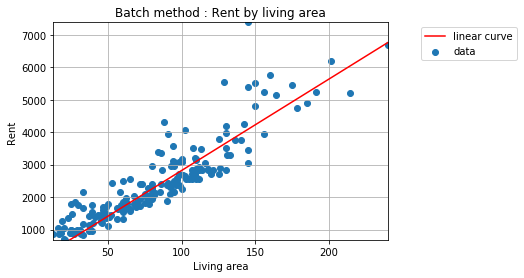

In [42]:
x_curve = np.array(np.linspace(np.min(X),np.max(X),200))
y_curve = x_curve * slope + intercept

plt.title('Batch method : Rent by living area')
plt.xlabel('Living area')
plt.ylabel('Rent')
plt.scatter(X,y)
plt.plot(x_curve,y_curve,color='red')
plt.legend(['linear curve','data'],bbox_to_anchor=(1.4, 1))
plt.grid(True)
plt.xlim(np.min(X),np.max(X))
plt.ylim(np.min(y),np.max(y))
plt.show()

b) How many samples do you need to visit for reaching the convergence ?

c) What kind of stopping criterion could we use here ?

As disscused in the lecture there is not one best solution. 
Here I chose to calculate the cost after every epoch and compare it to the cost of the last iteration through the data set. 
It is very important to choose the critera in a way, that is is not impacted by the randomness of the dat point chosing. E.g. $$ \theta_{n-1} - \theta_{n}$$ Here, if two point are chosen, that are very close the $\theta$ does not chance alot. We stop the convergence too soon.

c) What kind of stopping criterion could we use here ?

As disscused in the lecture there is not one best solution. 
Here I chose to calculate the cost after every epoch and compare it to the cost of the last iteration through the data set. 
It is very important to choose the critera in a way, that is is not impacted by the randomness of the dat point chosing. E.g. $$ \theta_{n-1} - \theta_{n}$$ Here, if two point are chosen, that are very close the $\theta$ does not chance alot. We stop the convergence too soon.

d) Compute the final cost value according to Equation 2 and compare it to the one of
exercise 2 and 3. What can you conclude ?

In [51]:
J_sto = calcualteJ(X,y,slope,intercept)

print("For the stochastic gradient desent ", J_sto,"For the badge gradient decent is ", J_bgd, "and for closed from solution ", J)

For the stochastic gradient desent  144977.3872830564 For the badge gradient decent is  144106.45423554225 and for closed from solution  138034.95779787414


## Exercice 5 : Mini-batch gradient descent for linear regression

Implement the mini-batch gradient descent algorithm for the previous problem, adding a parameter B defining the size of the mini-batch. Check that when
B=N, you fall back on the batch gradient descent solution, and when B=1, you get the behaviour of stochastic gradient
descent.

In [53]:
def hypothesis(x,theta):
    return theta.transpose().dot(x)

# Gradient descent function "Mini-Batch"
# when batch_size == 1 --> Stochastic
def gradientDescentMiniBatch(x,y,learning_rate,num_batch,batch_size=1,verbose=False):
    N = x.shape[0]     # number of sample
    D = x.shape[1]     # number of dimensions
    theta = np.ones(D) # init the thetas to some values
    new_theta = np.ones(D)
    
    for itr in range(0,num_batch):
        batch = rd.sample(range(0,N),batch_size) # pick b values randomly in set of index
        for j in range(0,D):
            cost = 0.0
            for i in batch:
                error = hypothesis(x[i],theta) - y[i]
                cost = cost + error * x[i,j]
            new_theta[j] = theta[j] - learning_rate * (1.0/batch_size) * cost
        theta = np.copy(new_theta) # update the thetas once the new values are all computed
        if verbose:
            print('itr : ',itr,'theta : ',theta)
    return theta

lr = 0.000001
itr = 10000

Xtmp = np.c_[np.ones(X.shape[0]),X]
theta = gradientDescentMiniBatch(Xtmp,y,lr,itr,batch_size=5)

slope = theta[1]
intercept = theta[0]

print('slope :',slope)
print('intercept :',intercept)

slope : 28.49703518399393
intercept : 1.7743758015269415


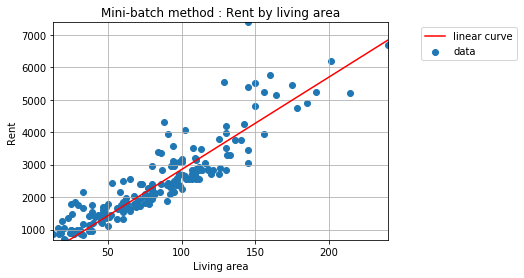

theta : [ 1.36968058 28.64581688] 
theta_batch: [ 1.36619152 28.65186262]
theta : [ 1.77441631 28.66076418] 
theta_stochastic: [ 1.28959689 28.19156444]


In [61]:
x_curve = np.array(np.linspace(np.min(X),np.max(X),200))
y_curve = x_curve * slope + intercept

plt.title('Mini-batch method : Rent by living area')
plt.xlabel('Living area')
plt.ylabel('Rent')
plt.scatter(X,y)
plt.plot(x_curve,y_curve,color='red')
plt.legend(['linear curve','data'],bbox_to_anchor=(1.4, 1))
plt.grid(True)
plt.xlim(np.min(X),np.max(X))
plt.ylim(np.min(y),np.max(y))
plt.show()

lr = lr_batch
itr = itr_batch

Xtmp = np.c_[np.ones(X.shape[0]),X]
theta = gradientDescentMiniBatch(Xtmp,y,lr,itr,batch_size=X.shape[0])

print('theta :',theta,'\ntheta_batch:',theta_batch)

lr = lr_stochastic
itr = itr_stochastic

Xtmp = np.c_[np.ones(X.shape[0]),X]
theta = gradientDescentMiniBatch(Xtmp,y,lr,itr,batch_size=1)

print('theta :',theta,'\ntheta_stochastic:',theta_stochastic)

## Exercice 6a : Multi-variable linear regression

a) Implement one of the gradient descent algorithm (ex. 3-5) for the multi-variable linear
regression assuming
x
1
being the living area and
x
2
the square of the living area. Plot
the computed curve (second order) on top of the scatter plot of exercise 1.

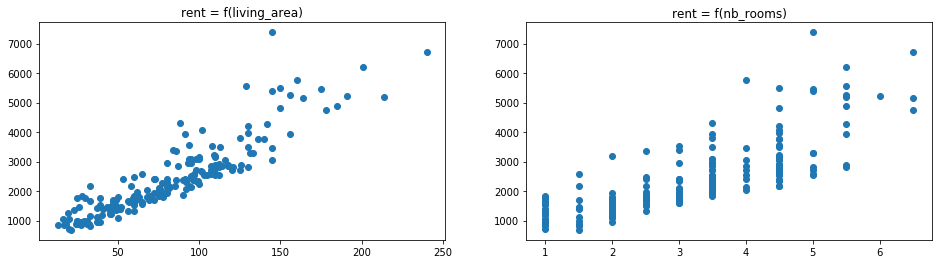

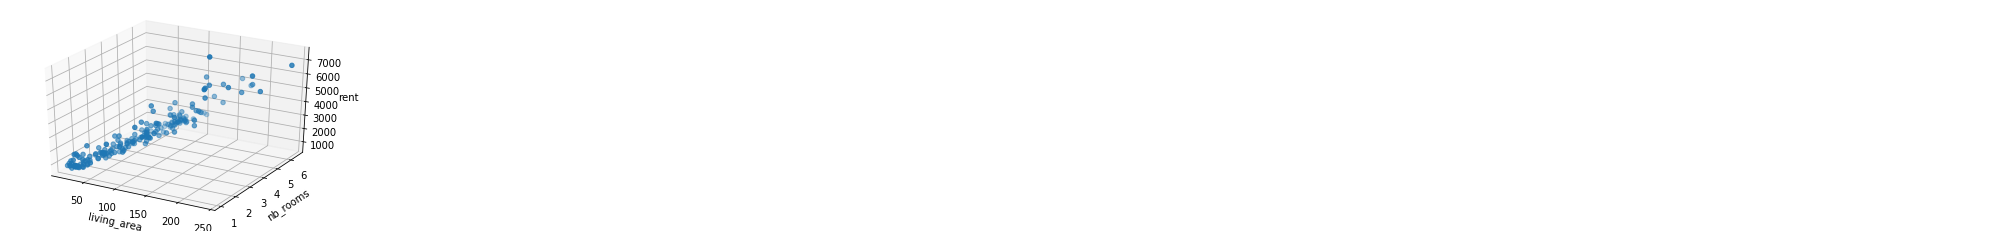

In [70]:
rent = dataset['rent'].values
living_area = dataset['living_area'].values
nb_rooms = dataset['nb_rooms'].values

A1 = dataset.loc[:,['living_area']].values.flatten()
A2 = dataset.loc[:,['nb_rooms']].values.flatten()
X = dataset.loc[:,['living_area','nb_rooms']].values
B = dataset.loc[:,['rent']].values.flatten()

plt.figure(1,figsize = (16, 4))
plt.subplot(1, 2, 1)
plt.title('rent = f(living_area)')
plt.scatter(living_area,rent)
plt.subplot(1,2,2)
plt.title('rent = f(nb_rooms)')
plt.scatter(nb_rooms,rent)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(living_area,nb_rooms,rent)
ax.set_xlabel('living_area')
ax.set_ylabel('nb_rooms')
ax.set_zlabel('rent')
plt.show()

In [71]:
# For verification
from sklearn import linear_model

regr = linear_model.LinearRegression()
res = regr.fit(X,rent)

theta = [regr.intercept_,regr.coef_[0],regr.coef_[1],]

slope_1 = theta[1]
slope_2 = theta[2]
intercept = theta[0]
print(theta)

[286.93086825718365, 28.661188757120193, -76.06313748941866]


In [72]:
def hypothesis(theta,X):  #theta = 1xD, X = DxN, output 1xN
    """
    Compute the actual value of the h function using x
    """
    return np.dot(theta,X)

# Gradient descent function using matricial calculus
def gradientDescent(X,y,learning_rate,num_epoch,verbose=False):
    N = X.shape[0]      # number of sample
    D = X.shape[1]      # number of dimensions
    theta = np.zeros(D) # init thetas to some values
    X_trans = X.transpose() # X_trans is DxN    
    for i in range(0,num_epoch):
        h = hypothesis(theta,X_trans)  #N dimension
        loss = h-y                     #N dimension
        if verbose :
            J = np.sum(loss ** 2) / (2 * N)
            print('itr :',i,' cost : ',J)
        gradient = X_trans.dot(loss) / N
        theta = theta - learning_rate * (1.0/N) * gradient
    return theta

In [73]:
Xtmp = np.c_[np.ones(X.shape[0]),X]
theta = np.zeros(Xtmp.shape[1])

lr = 0.001
itr = 1000

theta = gradientDescent(Xtmp,rent,lr,itr,verbose=False)
print(theta)

slope_1 = theta[1]
slope_2 = theta[2]
intercept = theta[0]


[ 0.53074014 28.61513173  1.06130166]


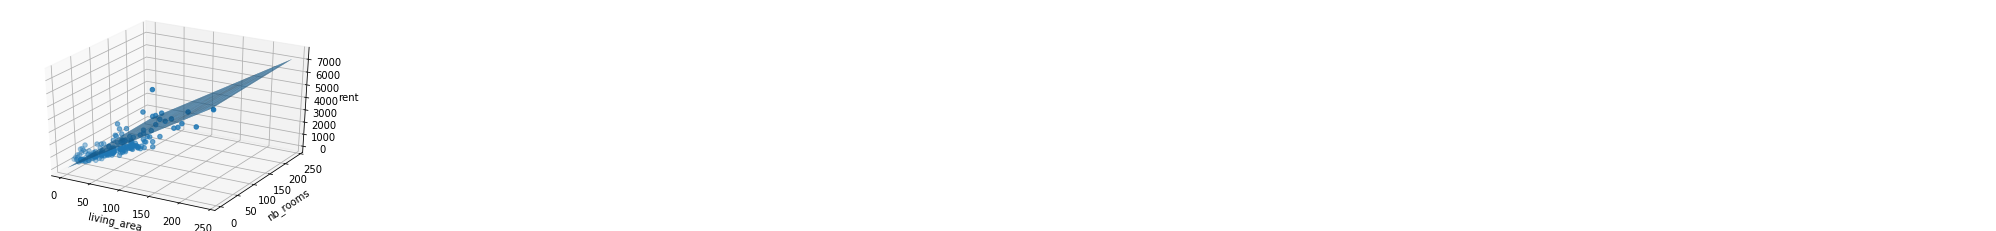

In [74]:
x = np.array(np.linspace(np.min(X),np.max(X),200))
y = np.array(np.linspace(np.min(X),np.max(X),200))

x,y = np.meshgrid(x,y)

z = intercept + (x * slope_1) + (y * slope_2)

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.scatter(living_area,nb_rooms,rent)
ax.plot_surface(x,y,z)
ax.set_xlabel('living_area')
ax.set_ylabel('nb_rooms')
ax.set_zlabel('rent')

plt.show()

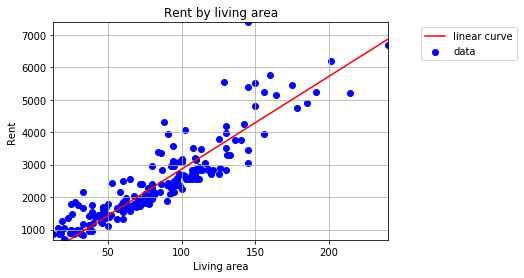

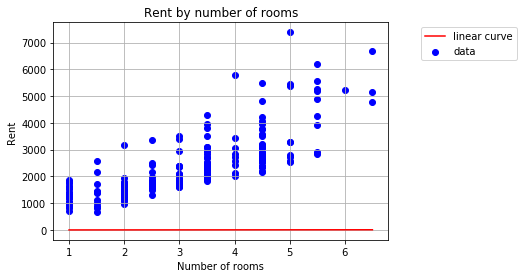

In [75]:
% matplotlib inline
x_curve = np.array(np.linspace(np.min(living_area),np.max(living_area),200))
y_curve = x_curve * slope_1 + intercept

plt.title('Rent by living area')
plt.xlabel('Living area')
plt.ylabel('Rent')
plt.scatter(A1,B,color='blue')
plt.plot(x_curve,y_curve,color='red')
plt.legend(['linear curve','data'],bbox_to_anchor=(1.4, 1))
plt.grid(True)
plt.xlim(np.min(living_area),np.max(living_area))
plt.ylim(np.min(rent),np.max(rent))
plt.show()

x_curve = np.array(np.linspace(np.min(nb_rooms),np.max(nb_rooms),200))
y_curve = x_curve * slope_2 + intercept

plt.title('Rent by number of rooms')
plt.xlabel('Number of rooms')
plt.ylabel('Rent')
plt.scatter(nb_rooms,B,color='blue')
plt.plot(x_curve,y_curve,color='red')
plt.legend(['linear curve','data'],bbox_to_anchor=(1.4, 1))
plt.grid(True)
plt.show()

b) Implement one of the gradient descent algorithm (ex. 3-5) for the multi-variable linear
regression assuming
x
1
being the living area and
x
2
the number of bedrooms.